In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from numpy import *
import sys
import matplotlib.pyplot as plt
%matplotlib inline  
from pylab import plot,show,hist,figure,title

In [2]:
pwd

'C:\\Users\\sfiso\\Desktop\\Python Classes\\Session 3 Python'

In [3]:
## Load datasets (download these files from dropbox into your local mention)
data_path = '/Users/sfiso/Desktop/Python Classes/Session 3 Python/'  ### change this path to location of the files in your local mention.
cesm_o2_200m_ds = xr.open_dataset(data_path+'cesm_o2_1850_2005_hist_200m_yr_ds.nc')
cesm_temp_200m_ds = xr.open_dataset(data_path+'cesm_temp_1850_2005_hist_200m_yr_ds.nc')
area_ds = xr.open_dataset(data_path+'cesm_area_cm2_ds.nc').TAREA

In [4]:
## display data content; variables and dimension 1
cesm_o2_200m_ds.TLAT

<xarray.DataArray 'TLAT' (nlat: 384, nlon: 320)>
[122880 values with dtype=float64]
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  array of t-grid latitudes
    units:      degrees_north

In [5]:
## display data content; variables and dimension 2
cesm_temp_200m_ds

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, year: 157)
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP       (year, nlat, nlon) float32 ...

(array([ 893794., 1725557.,  719909.,  687365., 1059253., 2638747.,
        2393734., 2003292.,  458774.,   26047.]),
 array([-1.8531929,  0.691332 ,  3.235857 ,  5.7803817,  8.324906 ,
        10.8694315, 13.413957 , 15.958482 , 18.503006 , 21.047531 ,
        23.592056 ], dtype=float32),
 <BarContainer object of 10 artists>)

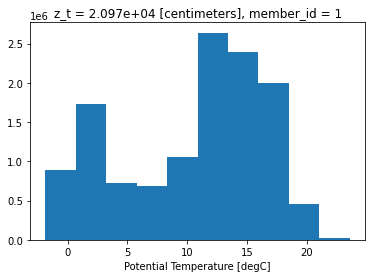

In [6]:
cesm_temp_200m_ds.TEMP.plot()

In [7]:
cesm_o2_200m_ds.O2

<xarray.DataArray 'O2' (year: 157, nlat: 384, nlon: 320)>
[19292160 values with dtype=float32]
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 2.097e+04
    member_id  int64 1
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Dissolved Oxygen
    units:         mmol/m^3
    grid_loc:      3111
    cell_methods:  time: mean

In [8]:
area_ds.sum?

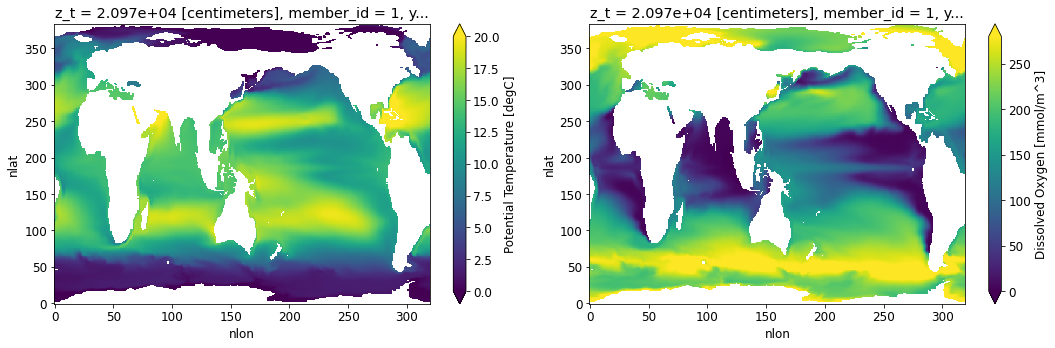

In [9]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = 1900).plot(vmin = 0,vmax = 20)

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = 1900).plot(vmin = 0,vmax = 280)

plt.tight_layout()

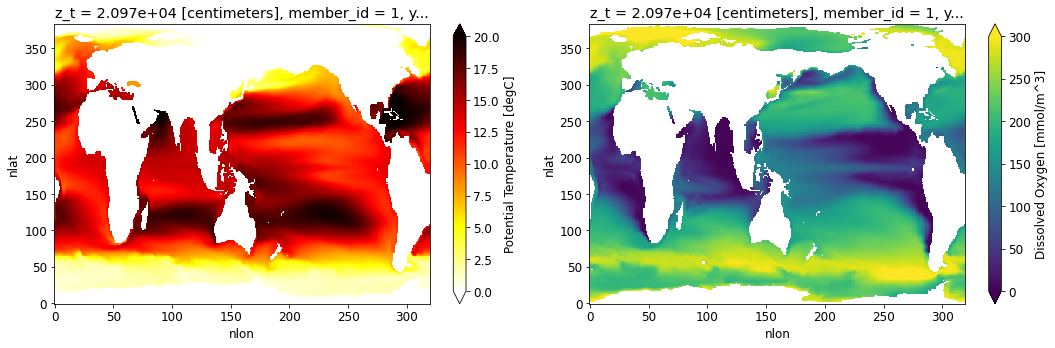

In [10]:
## Add colorbars
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = 1850).plot(vmin = 0,vmax = 20,cmap = 'hot_r')

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = 1850).plot(vmin = 0,vmax = 300)

plt.tight_layout()

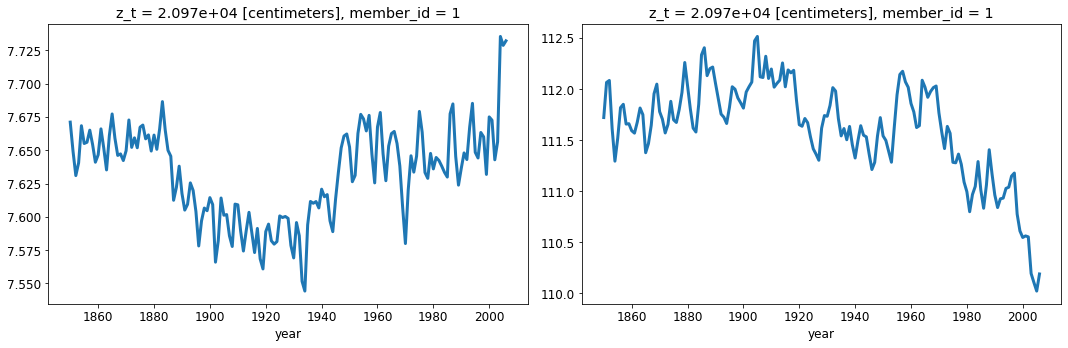

In [11]:
## computed a global weighted mean time series (use area to compute a weighted mean)
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

## weighted mean = SUM(var*wights)/SUM(weight)

plt.subplot(121)
((cesm_temp_200m_ds.TEMP*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()
# (cesm_temp_200m_ds.TEMP).mean(dim = ['nlon','nlat']).plot()
plt.subplot(122)
((cesm_o2_200m_ds.O2*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.tight_layout()

In [12]:
cesm_temp_200m_ds.TEMP.sel(year = [1900,1920])

<xarray.DataArray 'TEMP' (year: 2, nlat: 384, nlon: 320)>
[245760 values with dtype=float32]
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 2.097e+04
    member_id  int64 1
  * year       (year) int64 1900 1920
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

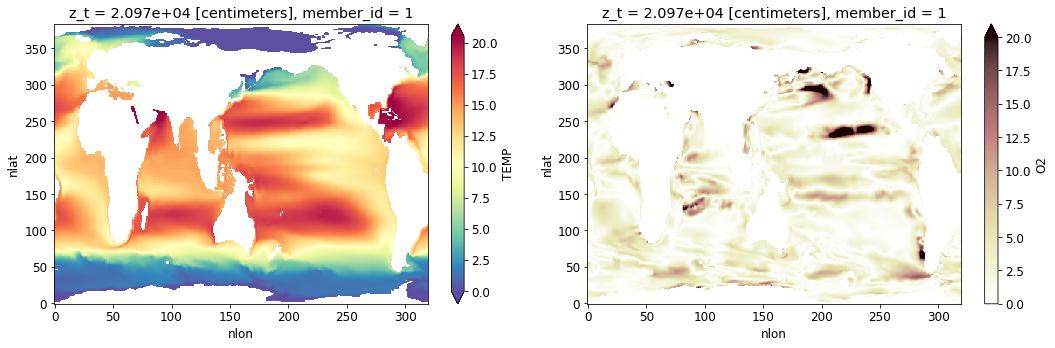

In [13]:
## Add colorbars
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = [1850,1960]).median('year').plot(vmin =0,vmax = 20.5,cmap = 'Spectral_r')

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = [1850,1960]).std('year').plot(vmin =0,vmax = 20,cmap = 'pink_r')

plt.tight_layout()

Exercises

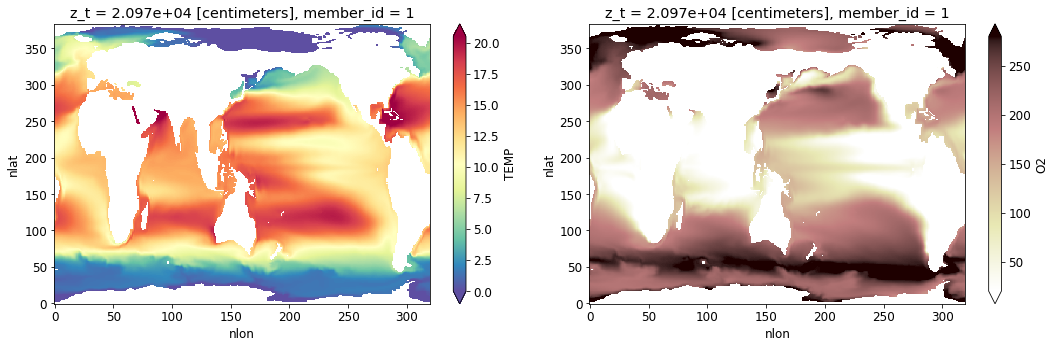

In [14]:
### Plot a map of Tempetarure and dissolved climatologial mean for the period 1960 - 2005
## Add colorbars
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = [1960,2005]).mean('year').plot(vmin =0,vmax = 20.5,cmap = 'Spectral_r')

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = [1960,2005]).mean('year').plot(vmin =20,vmax = 280,cmap = 'pink_r')

plt.tight_layout()

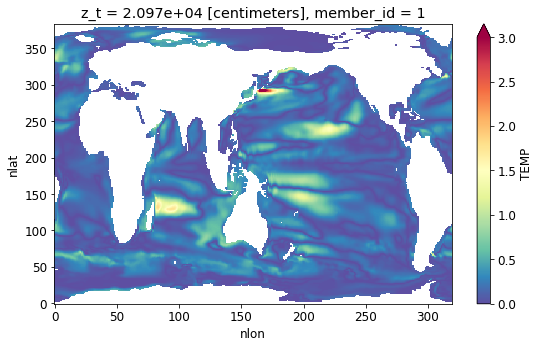

In [18]:
### Plot a map of Tempetarure and dissolved stardand deviation for the period 1960 - 2005
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = [1960,2005]).std('year').plot(vmin =0,vmax = 3,cmap = 'Spectral_r')
plt.tight_layout()

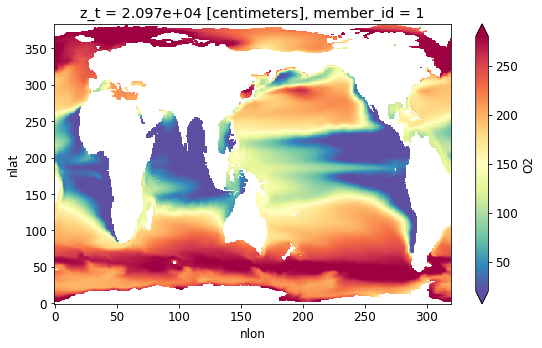

In [21]:
### Plot a map of Tempetarure and dissolved oxygen meadian for the period 1960 - 2005
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3


plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = [1960,2005]).median('year').plot(vmin =20,vmax = 280,cmap = 'Spectral_r')

plt.tight_layout()

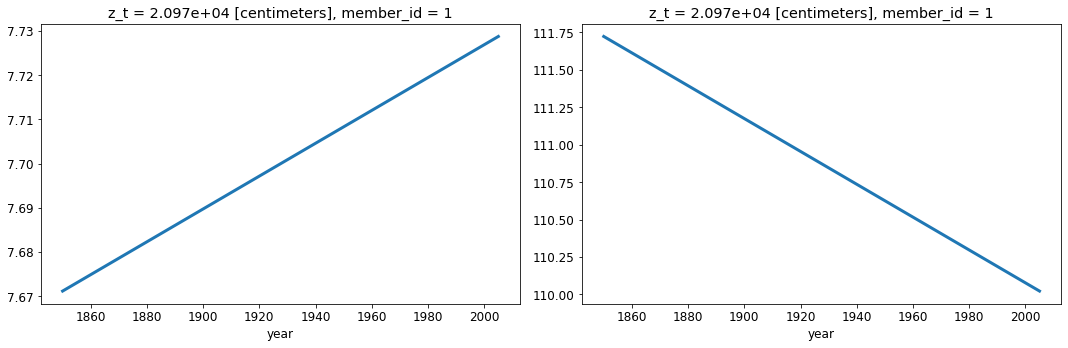

In [24]:
### Plot a time series of the global sum of temperature and dissolved meadian for the period 1850 - 2005

plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

## weighted mean = SUM(var*wights)/SUM(weight)

plt.subplot(121)
((cesm_temp_200m_ds.TEMP.sel(year = [1850,2005])*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()
# (cesm_temp_200m_ds.TEMP).mean(dim = ['nlon','nlat']).plot()
plt.subplot(122)
((cesm_o2_200m_ds.O2*area_ds).sel(year = [1850,2005]).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.tight_layout()

In [25]:
%%time
### Calculate the correlation coeffient between the global mean Temperature and dissolved oxygen for the period 1850 - 1960 and 1960 - 2005

## select time periods
time_1850_1960 = slice('1850', '1960') 
time_1960_2005 = slice('1960', '2005')
cesm_temp_200m_1850_1960_ds = cesm_temp_200m_ds.TEMP.sel(year = time_1850_1960)
cesm_temp_200m_1960_2005_ds = cesm_temp_200m_ds.TEMP.sel(year = time_1960_2005)

cesm_o2_200m_1850_1960_ds = cesm_o2_200m_ds.O2.sel(year = time_1850_1960)
cesm_o2_200m_1960_2005_ds = cesm_o2_200m_ds.O2.sel(year = time_1960_2005)

## computes the weighted mean 
cesm_temp_1850_1960_ts = (((cesm_temp_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_temp_1960_2005_ts = (((cesm_temp_200m_1960_2005_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_o2_1850_1960_ts = (((cesm_o2_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_o2_1960_2005_ts = (((cesm_o2_200m_1960_2005_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

print(np.corrcoef(cesm_temp_1850_1960_ts,cesm_o2_1850_1960_ts)[1,0])
print(np.corrcoef(cesm_temp_1960_2005_ts,cesm_o2_1960_2005_ts)[1,0])

-0.20266512329888947
-0.4478812636182565
Wall time: 960 ms


In [26]:
%%time
### plot a map of  the correlation coeffient between Temperature and dissolved oxygen 
#global means for period 1850 - 1960 and 1960 - 2005

R_temp_o2_1850_1960_ds = np.full(shape =(len(cesm_temp_200m_1850_1960_ds.nlat),len(cesm_temp_200m_1850_1960_ds.nlon)),fill_value=np.nan)
for i in range(len(cesm_temp_200m_1850_1960_ds.nlat)):
    for j in range(len(cesm_temp_200m_1850_1960_ds.nlon)):
        
        temp_i = cesm_temp_200m_1850_1960_ds[:,i,j]
        o2_i = cesm_o2_200m_1850_1960_ds[:,i,j]
        
        R_i = np.corrcoef(temp_i,o2_i)[1,0]
                           
        R_temp_o2_1850_1960_ds[i,j] = R_i

KeyboardInterrupt: 

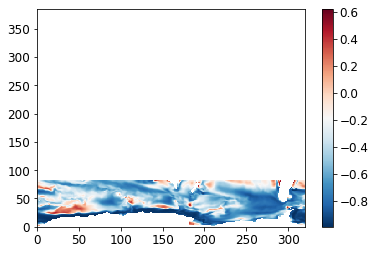

In [27]:
## Numpy output 
plt.pcolormesh(R_temp_o2_1850_1960_ds,cmap = 'RdBu_r')
plt.colorbar()

In [25]:
### convert data numpy to xarray
R_temp_o2_1850_1960_xr = xr.DataArray(R_temp_o2_1850_1960_ds,dims = ('nlat','nlon'))

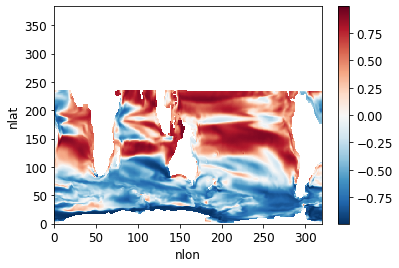

In [26]:
R_temp_o2_1850_1960_xr.plot()

In [28]:
#### Numpy based function that computes correlation coefficient or regression 

def F_vars_corr_coef_int_ftrend(var_y,var_x,p_crf,p_rgr):
    """ computes the correlations coefficient(p_crf=1 & p_rgr=0) and 
    regression slope (p_crf=0 & p_rgr=1) in 3d fields"""
    
    ## create a empty numpy matrice with NaNs 
    var_cr = np.full(shape =(len(var_y.nlat),len(var_y.nlat)),fill_value=np.nan)
    
    cr_p = len(var_y.year)
    
    ### loop through the every latitude (i) and longitude (j) of the import data
    for i in range(len(var_y.nlat)):
        for j in range(len(var_y.nlon)):
            
            X = var_x[:,i,j].fillna(0)
            Y = var_y[:,i,j].fillna(0)

            ### computes corelation and regression slop
            (r, p) = stats.pearsonr(X, Y)
            slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)
                                                                
            var_cr[i,j] = slope*p_rgr + r_value*p_crf
            
    ## convert output file into a xarray format
    var_cr_gfxr = xr.DataArray(var_cr,dims=('nlat','nlon'))
            
    return var_cr_gfxr


In [30]:
## computes the weighted mean 
var_y = (((cesm_temp_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_temp_1960_2005_ts = (((cesm_temp_200m_1960_2005_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

var_x = (((cesm_o2_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_o2_1960_2005_ts = (((cesm_o2_200m_1960_2005_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

In [31]:
var_y = (((cesm_temp_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))
var_x = (((cesm_o2_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

def F_vars_corr_coef_int_ftrend(var_y,var_x,p_crf,p_rgr):
    """ computes the correlations coefficient(p_crf=1 & p_rgr=0) and 
    regression slope (p_crf=0 & p_rgr=1) in 3d fields"""
    
    ## create a empty numpy matrice with NaNs 
    var_cr = np.full(shape =(len(var_y.nlat),len(var_y.nlat)),fill_value=np.nan)
    
    cr_p = len(var_y.year)
    
    ### loop through the every latitude (i) and longitude (j) of the import data
    for i in range(len(var_y.nlat)):
        for j in range(len(var_y.nlon)):
            
            X = var_x[:,i,j].fillna(0)
            Y = var_y[:,i,j].fillna(0)

            ### computes corelation and regression slop
            (r, p) = stats.pearsonr(X, Y)
            slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)
                                                                
            var_cr[i,j] = slope*p_rgr + r_value*p_crf
            
    ## convert output file into a xarray format
    var_cr_gfxr = xr.DataArray(var_cr,dims=('nlat','nlon'))
            
    return var_cr_gfxr


In [ ]:
R_temp_o2_1850_1960_ds = np.full(shape =(50,50),fill_value=np.nan)

for i in range(50):
    for j in range(50):
        
        temp_i = cesm_temp_200m_1850_1960_ds[:,i,j]
        o2_i = cesm_o2_200m_1850_1960_ds[:,i,j]
        
        R_i = np.corrcoef(temp_i,o2_i)[1,0]
#         print(R_i)                   
        R_temp_o2_1850_1960_ds[i,j] = R_i